In classical linear regression models, one of the assumptions we make is that the variance of disturbance(error) term is constant and this assumption is known as ***Homoscedasticity*** [ie. equal(homo) spread(scedasticity)].  

If $ \epsilon $ is the error term, then $ E(\epsilon_i^2) = \sigma^2$  where $\sigma$ is the standard deviation.

 The violation of this assumption is ***Heteroscedasticity***.  
 Some of the causes of Heteroscedasticity include,
*   Presence of outliers in the observations (stock prices)
*   Incorrect transformation of data used for the regression model
*   When regression model is itself wrongly specified
*   Skewness in distribution of regressor variables. For example, economic variables like income are unevenly distibuted  

In the presence of heteroscedasticity, the estimators are no longer efficient and hypothesis tests(like t-test, F-test) become invalid. So, it is essential to detect heteroscedasticity and adjust for it.






In [24]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

%matplotlib inline


Firstly, let's create a heteroscedastic dataset and plot it to see how it looks like!

In [15]:
#setting sample size
size = 100

#generating a random sample for the independent variable x
x = np.random.uniform(low = 0, high = 100, size = size)

#generating the error term which increases with increasing values of x
u = np.random.rand(size) * x

#generating the dependent variable y using a arbitrary expression
y = 5 + 1.1*x + u

Text(0, 0.5, 'y')

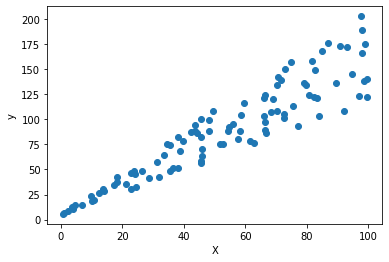

In [19]:
#ploting the data
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('y')

We can clearly see that the y value varies a lot for larger values of x  
Although we now detected heteroscedasticity by visualising the data, there are some standard statistical tests to detect heteroscedasticity.  
We will now use the functions from [statsmodels](https://www.statsmodels.org/dev/diagnostic.html) library to perform *Breusch-Pagan test* and *Goldfeld-Quandt test*.

In [40]:
#performing OLS fit as residual values are needed for Breusch-Pagan test
model = sm.OLS(y,x).fit()

#extracting residual values from the fitted model
residuals = model.resid

#performing Breusch-Pagan test
bp_test = het_breuschpagan(residuals, x.reshape(-1,1))

#zipping and printing the results 
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))


{'LM Statistic': 54.2706865809935, 'LM-Test p-value': nan, 'F-Statistic': 117.49133257892424, 'F-Test p-value': 1.6286496770569402e-18}
